<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="20%" height="20%" />


<hr style="height:2px;border:none"/>
<h1 align='center'> INF-393 Máquinas de Aprendizaje II-2019 </h1>

<H3 align='center'> Tarea 1  </H3>
<H3 align='center'> Alexander Ruz Rojas </H3>
<H3 align='center'> Gabriel Pezoa Riutor  </H3>
<hr style="height:2px;border:none"/>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import scipy.stats as stats
import pylab

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
headers = ['age','sex','chest_pain','blood_p','serum','blood_s','electro','max_heart', 'angina','oldpeak','slope','vessel','thal','normal']
df = pd.read_csv("heart.dat", header=None, names=headers, sep=' ')
df['sex'][df['sex'] == 0] = 'female'
df['sex'][df['sex'] == 1] = 'male'
df['chest_pain'][df['chest_pain'] == 1] = 'typical angina'
df['chest_pain'][df['chest_pain'] == 2] = 'atypical angina'
df['chest_pain'][df['chest_pain'] == 3] = 'non-anginal pain'
df['chest_pain'][df['chest_pain'] == 4] = 'asymptomatic'
df['blood_s'][df['blood_s'] == 0] = 'lower than 120mg/ml'
df['blood_s'][df['blood_s'] == 1] = 'greater than 120mg/ml'
df['electro'][df['electro'] == 0] = 'normal'
df['electro'][df['electro'] == 1] = 'ST-T wave abnormality'
df['electro'][df['electro'] == 2] = 'left ventricular hypertrophy'
df['angina'][df['angina'] == 0] = 'no'
df['angina'][df['angina'] == 1] = 'yes'
df['slope'][df['slope'] == 1] = 'upsloping'
df['slope'][df['slope'] == 2] = 'flat'
df['slope'][df['slope'] == 3] = 'downsloping'
df['thal'][df['thal'] == 3] = 'normal'
df['thal'][df['thal'] == 6] = 'fixed defect'
df['thal'][df['thal'] == 7] = 'reversable defect'


/Users/Gabriel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Gabriel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/Gabriel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/

In [4]:
df.head(500)


,age,sex,chest_pain,blood_p,serum,blood_s,electro,max_heart,angina,oldpeak,slope,vessel,thal,normal
0,70.0,male,asymptomatic,130.0,322.0,lower than 120mg/ml,left ventricular hypertrophy,109.0,no,2.4,flat,3.0,normal,2
1,67.0,female,non-anginal pain,115.0,564.0,lower than 120mg/ml,left ventricular hypertrophy,160.0,no,1.6,flat,0.0,reversable defect,1
2,57.0,male,atypical angina,124.0,261.0,lower than 120mg/ml,normal,141.0,no,0.3,upsloping,0.0,reversable defect,2
3,64.0,male,asymptomatic,128.0,263.0,lower than 120mg/ml,normal,105.0,yes,0.2,flat,1.0,reversable defect,1
4,74.0,female,atypical angina,120.0,269.0,lower than 120mg/ml,left ventricular hypertrophy,121.0,yes,0.2,upsloping,1.0,normal,1
5,65.0,male,asymptomatic,120.0,177.0,lower than 120mg/ml,normal,140.0,no,0.4,upsloping,0.0,reversable defect,1
6,56.0,male,non-anginal pain,130.0,256.0,greater than 120mg/ml,left ventricular hypertrophy,142.0,yes,0.6,flat,1.0,fixed defect,2
7,59.0,male,asymptomatic,110.0,239.0,lower than 120mg/ml,left ventricular hypertrophy,142.0,yes,1.2,flat,1.0,reversable defect,2
8,60.0,male,asymptomatic,140.0,293.0,lower than 120mg/ml,left ventricular hypertrophy,170.0,no,1.2,flat,2.0,reversable defect,2
9,63.0,female,asymptomatic,150.0,407.0,lower than 120mg/ml,left ventricular hypertrophy,154.0,no,4.0,flat,3.0,reversable defect,2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
age           270 non-null float64
sex           270 non-null object
chest_pain    270 non-null object
blood_p       270 non-null float64
serum         270 non-null float64
blood_s       270 non-null object
electro       270 non-null object
max_heart     270 non-null float64
angina        270 non-null object
oldpeak       270 non-null float64
slope         270 non-null object
vessel        270 non-null float64
thal          270 non-null object
normal        270 non-null int64
dtypes: float64(6), int64(1), object(7)
memory usage: 29.6+ KB


In [6]:
df.describe()

,age,blood_p,serum,max_heart,oldpeak,vessel,normal
count,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000
mean,54.433333,131.344444,249.659259,149.677778,1.05000,0.670370,1.444444
std,9.109067,17.861608,51.686237,23.165717,1.14521,0.943896,0.497827
min,29.000000,94.000000,126.000000,71.000000,0.00000,0.000000,1.000000
25%,48.000000,120.000000,213.000000,133.000000,0.00000,0.000000,1.000000
50%,55.000000,130.000000,245.000000,153.500000,0.80000,0.000000,1.000000
75%,61.000000,140.000000,280.000000,166.000000,1.60000,1.000000,2.000000
max,77.000000,200.000000,564.000000,202.000000,6.20000,3.000000,2.000000


a) Visualice los datos trabajados describiendo el comportamiento de las variables para entender el problema al que se enfrenta. ¿Qué ocurre con el comportamiento entre pacientes sanos y enfermos? Haga gráficos si estima conveniente (histogramas, boxplots, etc).

Promedio de presión de pacientes sanos: 126.8
Promedio de presión de pacientes enfermos: 132.78536585365853


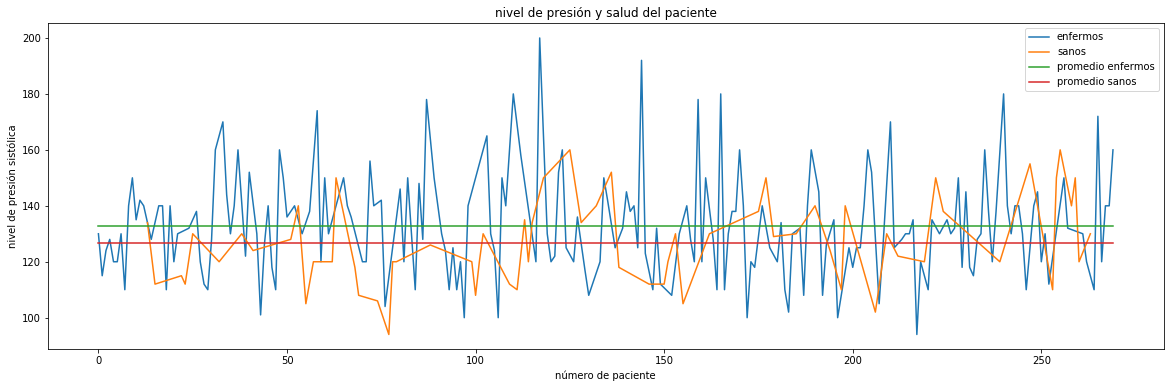

In [7]:
x = df[(df['angina'] == 'yes') | (df['thal'] != 'normal') | (df['electro'] != 'normal')]['blood_p']
y = df[(df['angina'] == 'no') & (df ['thal'] == 'normal') & (df['electro'] == 'normal')]['blood_p']

x_prom = (x.describe())[1]
x_means = [x_prom]*270

y_prom = (y.describe())[1]
y_means = [y_prom]*270


plt.figure(figsize = (20,6))
plt.title("nivel de presión y salud del paciente")
plt.xlabel("número de paciente")
plt.ylabel('nivel de presión sistólica')
plt.plot(x,label = 'enfermos')
plt.plot(y,label = 'sanos')
plt.plot(x_means,label = 'promedio enfermos')
plt.plot(y_means,label = 'promedio sanos')

plt.legend()


print('Promedio de presión de pacientes sanos:', y_prom)
print('Promedio de presión de pacientes enfermos:', x_prom)





Se observan datos de personas, en los cuales por cada una se puede encontrar:
- edad
- género
- si presenta dolor torácico
- suero
- presión sanguínea diastólica (baja)
- electro
- máximo latidos cardíacos
- si presenta angina (dolor de pecho) por reducción de flujo sanguíneo.
- oldpeak 
- rampa, acceso
- vessel
- talasemia (menor producción de glóbulos rojos y menos hemoglobina)
- normal

Por lo que se decidió calificar como enfermos a los que presentes alguna enfermedad en la clasificación de angina, electro, talasemia (thal). De acuerdo a esto, se utilizó la presión sanguínea sistólica, en la cual si ésta es mayor a 140 y menor a 100, se puede desprender que su presión es alta o baja respectivamente y puede tener alguna enfermedad.

En el gráfico anterior se observa lo explicado anteriormente, donde los pacientes sanos, se sitúan en su mayoría en esa zona (100,140), ademas que entre ellos tienen un promedio de 127 de presión, mientras que los pacientes enfermos muchos se sitúan fuera de esta zona o muy a los límites, además su presión promedio es de 132.


b) Debido a que utilizaremos modelos lineales, necesitaremos una representación adecuada de los datos. Codifique las variables con valores categóricos para ser representados como *one hot vectors*, indicando con un 1 la presencia del atributo en cuestión. Por ejemplo, si un paciente tiene el atributo "sex: female", quedará codificado como [0,1], mientras que si tiene el atributo "sex: male", quedará como [1,0]. **Explique la importancia de éste paso.**

In [8]:
df = pd.get_dummies(df)
df.head()

,age,blood_p,serum,max_heart,oldpeak,vessel,normal,sex_female,sex_male,chest_pain_asymptomatic,chest_pain_atypical angina,chest_pain_non-anginal pain,chest_pain_typical angina,blood_s_greater than 120mg/ml,blood_s_lower than 120mg/ml,electro_ST-T wave abnormality,electro_left ventricular hypertrophy,electro_normal,angina_no,angina_yes,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
0,70.0,130.0,322.0,109.0,2.4,3.0,2,0,1,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0
1,67.0,115.0,564.0,160.0,1.6,0.0,1,1,0,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,1
2,57.0,124.0,261.0,141.0,0.3,0.0,2,0,1,0,1,0,0,0,1,0,0,1,1,0,0,0,1,0,0,1
3,64.0,128.0,263.0,105.0,0.2,1.0,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,1
4,74.0,120.0,269.0,121.0,0.2,1.0,1,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0


Es importante declarar los valores categóricos como one hot vectors, ya que al ser un vector donde solo un elemento (bit) es uno, se puede calificar dicho vector como un estado de la representación

c) Extraiga la información de la enfermedad cardíaca (*clase binaria*) además de la variable continua que nos intereserá predecir en esta instancia (*target*) con un modelo de regresión lineal.

In [9]:
class_label = df.pop("normal").values -1  # 0 means absence, 1 means presence  Variable Y
class_label = class_label.reshape(-1,1)
reg_label = df.pop("blood_p").values      #Variable X
reg_label = reg_label.reshape(-1,1)
X_data = df.values



Se obtienen los datos de si es que el paciente está normal o no (1 y 0 respectivamente), guardados en el vector class_label, también se obtienen los datos de la presión sanguínea de cada paciente guarxados en el vector reg_label, con el fin de poder interpretar si es que la presión sanguínea afecta en que el paciente este normal o no. 

d) Cree un conjunto de pruebas para evaluar los modelos construidos en el problema. Extraiga el 30\% de los datos del conjunto total para representar el conjunto de pruebas.

In [10]:
np.random.seed(0)
mask_test = np.random.rand(X_data.shape[0]) < 0.30

X_train = X_data[~mask_test] 
X_test = X_data[mask_test] 

reg_label_train = reg_label[~mask_test] 
reg_label_test = reg_label[mask_test]

class_label_train = class_label[~mask_test] 
class_label_test = class_label[mask_test]

train = linear_model.LinearRegression()
train.fit(reg_label_train,class_label_train)
y_p = train.predict(reg_label_test)

print("Train: ",X_train.shape)
print("Test: ",X_test.shape)

Train:  (184, 24)
Test:  (86, 24)


Se dividen los datos en 30% para entrenar y el 70% para testear y predecir un resultado. 

e) Realice una estandarización normal de los datos de entrada al modelo (*input*). **Comente la importancia/conveniencia de realizar este paso**.

In [11]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
std.fit(X_train)
Xstd_train = std.transform(X_train) 
Xstd_test = std.transform(X_test)

print(Xstd_train)
print(Xstd_test)

[[ 1.6925911   1.29249516 -1.79283968 ... -0.26413527  0.90652202
  -0.79266549]
 [ 1.36139284  5.76291806  0.49427391 ... -0.26413527 -1.10311716
   1.26156621]
 [ 0.25739865  0.16565302 -0.35778802 ... -0.26413527 -1.10311716
   1.26156621]
 ...
 [-0.29459845 -0.97966194  0.58396464 ... -0.26413527 -1.10311716
   1.26156621]
 [ 0.14699923  0.77525615  0.18035636 ... -0.26413527  0.90652202
  -0.79266549]
 [ 1.36139284  0.62747357 -1.83768504 ... -0.26413527  0.90652202
  -0.79266549]]
[[ 0.25739865  0.94151154  0.44942854 ... -0.26413527  0.90652202
  -0.79266549]
 [ 1.80299052 -1.90330303 -1.07531385 ... -0.26413527  0.90652202
  -0.79266549]
 [-0.95699497  1.08929412 -1.29954067 ... -0.26413527 -1.10311716
   1.26156621]
 ...
 [ 0.36779807  0.59052793  0.49427391 ... -0.26413527  0.90652202
  -0.79266549]
 [-1.1777938   0.20259867  1.07726364 ... -0.26413527 -1.10311716
   1.26156621]
 [ 0.25739865 -1.10897169 -0.04387047 ...  3.7859389  -1.10311716
  -0.79266549]]


Los datos de entrada se estandarizan, lo que implica que su media es 0 y su varianza es 1, con lo cual es posible comparar distintos datos aunque tengan distinta unidad de medida, por ejemplo, si gran parte de los datos de la edad se acerca a la media igual a 0 y gran parte de los datos se acerca a una presión sanguínea igual a 0 con media 0, es posible determinar que la gran mayoría de las personas, que tengan una edad cercana o igual al promedio, tienen una presión sanguínea promedia entre ellos o cercana a esa. 
Es posible realizar ese análisis, ya que no existen outliers, al menos en edad y presión sanguínea, ya que es muy díficil ver datos fuera de lo normal en estas clasificaciones.

f) Realice una regresión lineal de mı́nimos cuadrados básica para predecir el nivel de presión sanguínea. Mida los errores de predicción para cada dato en el conjunto de entrenamiento. Utilizando un *quantile-quantile plot* determine si es razonable la hipótesis de normalidad sobre los residuos del modelo.

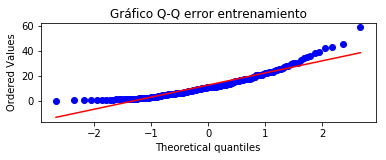

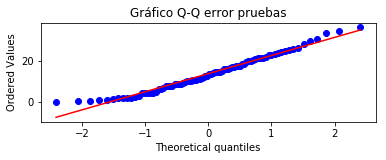

In [12]:
from sklearn.linear_model import LinearRegression
import statsmodels.graphics.gofplots as sm


model = LinearRegression(fit_intercept=True)
model.fit(Xstd_train, reg_label_train)
reg_pred_train = model.predict(Xstd_train)
reg_pred_test = model.predict(Xstd_test)

error_train = abs(reg_pred_train - reg_label_train)
error_train = np.sort(error_train, axis=None)
error_test = abs(reg_pred_test-reg_label_test)
error_test = np.sort(error_test, axis=None)

plot_error = plt.subplot(2,1,1)
stats.probplot(error_train,dist='norm',plot = plot_error)
plot_error.set_title('Gráfico Q-Q error entrenamiento')

plt.show(block=False)

plot_train = plt.subplot(2,1,2)
stats.probplot(error_test,dist='norm',plot = plot_train)
plot_train.set_title('Gráfico Q-Q error pruebas')
plt.show()

A pesar de los outliers del comienzo de ambos gráficos, no parece suficiente para afirmar que el error no tiene un comportamiento normal. Por lo que es razonable la hipótesis de normalidad

g) Construya una tabla con los pesos, Z-score y F-score correspondientes a cada predictor (variable), compare estos valores. ¿Qué sucede si hacemos un raking de los atributos en base al peso obtenido en la regresión? ¿Qué variables están más correlacionadas con la respuesta?

In [13]:
def z_score(X,Y):
    x_prom = sum(x)/len(x)
    y_prom = sum(y)/len(y)
    numerador = (sum(X) - x_prom)*(sum(Y) - y_prom)
    denominador = 
    return X,Y

print(z_score())
    
    

TypeError: z_score() missing 2 required positional arguments: 'X' and 'Y'

h) Para evaluar la calidad de las predicciones del modelo sobre el problema utilice el error absoluto medio (*mean absolute error*). Comente los resultados sobre en ambos conjuntos y la interpretación que se le da a la métrica de evaluación en el problema.

In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print("MSE train: ", mean_absolute_error(reg_label_train, reg_pred_train))
print("MSE test: ", mean_absolute_error(reg_label_test, reg_pred_test))

MSE train:  12.520139292308563
MSE test:  13.66061335199971


mean_absolute_error es una función que calcula el promedio de la suma de todos los errores entre el valor predicho y el valor real. Al observar los resultados. Para el conjunto de entrenamiento el error absoluto medio fue de 12.52, mientras que para el conjunto de pruebas fue de 13.66. Para el conjunto de entrenamiento, significa que cada dato de presión sanguínea por paciente en promedio varia 12.52, lo cual no es menor, ya que una presión normal es de 120 y al variarla en 12.52 se puede considerar alta, si es que es 120 + 12.52 o baja si es que es 120 - 12.52, se aplica lo mismo para el conjunto de pruebas.

i) Estime la calidad del modelo usando validación cruzada con un número de *fold* igual a $K=1$ (*leave-one-out*) y $K=5$. Recuerde que para que la estimación sea razonable, en cada configuración (*fold*) deberá reajustar los pesos del modelo. Compare esta estimación *vs* la calidad real (en conjunto de pruebas) y concluya.

In [14]:
from sklearn.model_selection import KFold
def val_cruz(K):
    kf = KFold(n_splits=K)
    mse_cv = 0
    for train, val in kf.split(Xstd_train):
        linreg = LinearRegression(fit_intercept=True)
        linreg.fit(Xstd_train[train], reg_label_train[train])
        yhat_kfold_val = linreg.predict(Xstd_train[val])
        mse_fold =  np.mean(np.square(yhat_kfold_val - reg_label_train[val]) )
        #print(val)
        #print(len(reg_label_train))
        mse_cv += mse_fold
    mse_cv = mse_cv / K
    return mse_cv
    
#print(val_cruz(1))
#Para K = 1

print(val_cruz(len(Xstd_train)))        #Para K = 1
print(val_cruz(5))                      #Para K = 5


336.1917692293552
362.10088054075266


La validación cruzada sirve para evaluar que tan independientes son el conjunto de test con el de prueba.

Para K = 1, se utilizó k = n (largo del conjunto de datos), ya que con K = 1 no es posible utilizar la función val_cruz().

Con K = 1, se hace una única iteración, que es utilizar como conjunto de prueba un conjunto y como conjunto de entrenamiento el resto del conjunto de datos, que fueron definidos en una pregunta anterior (h), además el uso de K=1, es imparcial, no se sabrá si dará buenos resultados o no, pero es más eficiente, ya que solo realiza una iteración.

Con K = 5, resultó que no es mejor que leave one out, a pesar de eso, con validación cruzada, se puede evitar el overfitting, pero para este conjunto de datos, como se vió en la pregunta anterior, es posible que no existe el sobreajuste.

j) Debido a la creación de varias columnas *dummys* en el punto b), experimente con técnicas de regularización para mejorar el desempeño de su modelo. Para ésto ajuste un modelo lineal utilizando "*Ridge Regression*", es decir, regularizando con la norma $l_2$, varíe los parámetros de regularización si estima conveniente. Construya un gráfico que muestre los coeficientes obtenidos como función del parámetro de regularización. Describa lo que observa. 

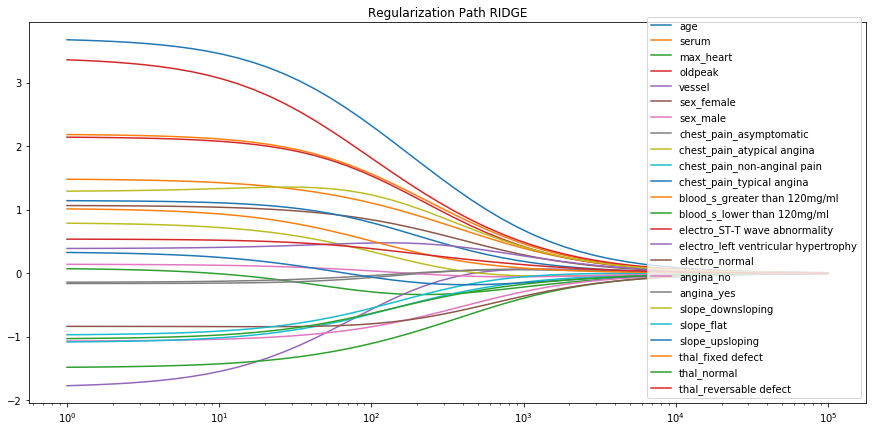

In [15]:
from sklearn.linear_model import Ridge
alphas_ = np.logspace(5,0, base=10)
coefs = []
model = Ridge(fit_intercept=True, solver='svd')
for a in alphas_:
    model.set_params(alpha=a)
    model.fit(Xstd_train, reg_label_train)
    coefs.append(model.coef_)
import matplotlib.pyplot as plt
names_regressors = df.columns
plt.figure(figsize=(15,7))
for y_arr, label in zip(np.squeeze(coefs).T, names_regressors):
    plt.plot(alphas_, y_arr, label=label)
plt.legend()
plt.xscale('log')
plt.title('Regularization Path RIDGE')
plt.legend(loc='lower right')
plt.show()

Al aumentar alfa, aquellos parámetros que disminuyen a cero de manera más lenta, son los que mayor información brindan, es decir, son parámetros más importantes respecto al resto, ya que tienen un mayor peso. Para este conjunto de datos se observa que los parámetros:
- age
- oldpeak
- serum

Tienen un mayor peso al variar alfa respecto a los otros parámetros.

k) Ahora experimente regularizando con la norma $l_1$, lo que corresponde a utilizar el método "*Lasso*". Vuelva a realizar el gráfico mostrando los coeficientes obtenidos, describa lo que observa. ¿Es más efectivo *Lasso* para seleccionar atributos?

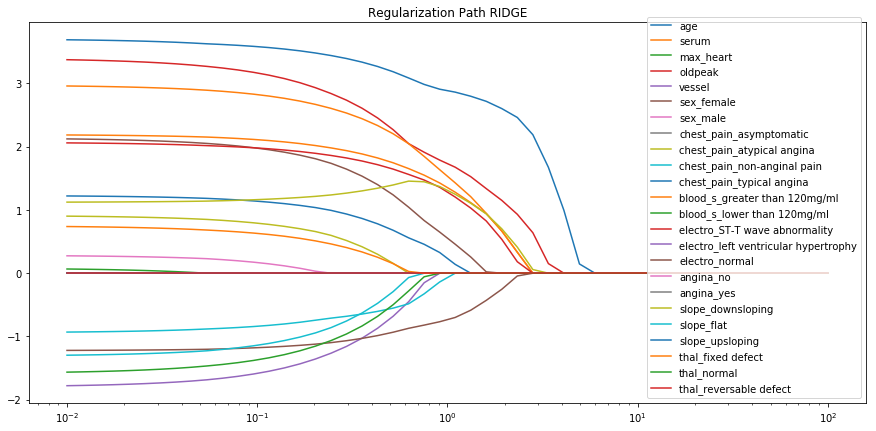

In [16]:
from sklearn.linear_model import Lasso
alphas_ = np.logspace(2,-2,base=10)
coefs = []
model = Lasso(fit_intercept=True)
for a in alphas_:
    model.set_params(alpha=a)
    model.fit(Xstd_train, reg_label_train)
    coefs.append(model.coef_)
... #plot again

import matplotlib.pyplot as plt
names_regressors = df.columns
plt.figure(figsize=(15,7))
for y_arr, label in zip(np.squeeze(coefs).T, names_regressors):
    plt.plot(alphas_, y_arr, label=label)
plt.legend()
plt.xscale('log')
plt.title('Regularization Path RIDGE')
plt.legend(loc='lower right')
plt.show()

Comparando las técnicas, se puede determinar que con Lasso es más efectivo para seleccionar atributos, ya que se observa claramente cuales son los parámetros que disminuyen a cero de manera más lenta. Son los mismos que utilizando la norma $l_2$, pero es más claro.

l) Evalúe la calidad de estos dos modelos en ambos conjuntos a distintos valores del parámetro de regularización. Haga uso de la *widget* interactiva de *ipython*. Comente ¿Con qué valor de *alpha* se quedaría en cada caso?

In [19]:
from ipywidgets import interactive
def train_model(param):
    #model = Ridge(fit_intercept=True, solver='svd')
    model = Lasso(fit_intercept=True)
    A = 10**(param)
    print("Param alpha= ",A)
    model.set_params(alpha=A)
    model.fit(Xstd_train, reg_label_train)
    print("MSE train: ", mean_squared_error(reg_label_train, model.predict(Xstd_train) ))
    print("MSE test: ", mean_squared_error(reg_label_test, model.predict(Xstd_test) ))
p_min = -10 #define your range
p_max = 10 #define your range
interactive(train_model, param=(p_min,p_max))

interactive(children=(IntSlider(value=0, description='param', max=10, min=-10), Output()), _dom_classes=('widget-interact',))



El overfitting, comienza cuando el MSE test comienza a aumentar, por lo que el alpha que conviene con Ridge es: 1e-06, mientras que con Lasso, para evitar el warning, conviene utilizar alpha = 0.001


m) De manera más estricta un médico le solicita un modelo que solo cuente con 5 características (variables) para predecir el nivel de presión sanguínea. Usted bien conoce un método que selecciona características de manera iterativa (*greedy*), con la idea de que la característica seleccionada tenga el mejor aporte sobre el desempeño del modelo. Construya una función que implemente *Forward Step-wise Selection* (FSS) sobre el modelo de regresión lineal clásico.  Para seleccionar localmente una característica, **proponga/implemente un criterio distinto al utilizado en el código de ejemplo** (**no** utilice el conjunto de pruebas). Construya un gráfico que muestre el error de entrenamiento y el error de pruebas como función del número de variables en el modelo.

In [20]:
def fss(x, y, names_x, k = 10000):
    p = x.shape[1]-1
    k = min(p, k)
    names_x = np.array(names_x)
    remaining = list(range(0, p))
    selected = [p]
    current_score = best_new_score = 0.0
    while remaining and len(selected)<=k :
        score_candidates = []
        for candidate in remaining:
            model = LinearRegression(fit_intercept=True, n_jobs=1)
            indexes = selected + [candidate]
            x_train = x[:,indexes]
            predictions_train = model.fit(x_train, y).predict(x_train)
            residuals_train =  predictions_train - y
            error_candidate =  np.mean(np.power(residuals_train, 2))
            score_candidates.append((error_candidate, candidate))
        score_candidates.sort()
        score_candidates[:] = score_candidates[::-1]
        best_new_score, best_candidate = score_candidates.pop()
        remaining.remove(best_candidate)
        selected.append(best_candidate)
        print ("selected = %s ..."%names_x[best_candidate])
        print ("totalvars=%d, mse = %f"%(len(indexes),best_new_score))
    return selected
features_fss = fss(Xstd_train, reg_label_train, names_regressors)
print(features_fss)
need_feat = features_fss[:5]
print(need_feat)

selected = age ...
totalvars=2, mse = 300.159978
selected = slope_downsloping ...
totalvars=3, mse = 290.470506
selected = electro_ST-T wave abnormality ...
totalvars=4, mse = 284.618970
selected = serum ...
totalvars=5, mse = 279.587430
selected = blood_s_greater than 120mg/ml ...
totalvars=6, mse = 275.297670
selected = oldpeak ...
totalvars=7, mse = 271.730415
selected = vessel ...
totalvars=8, mse = 269.396124
selected = chest_pain_non-anginal pain ...
totalvars=9, mse = 267.395934
selected = sex_female ...
totalvars=10, mse = 265.175946
selected = electro_left ventricular hypertrophy ...
totalvars=11, mse = 263.871372
selected = chest_pain_asymptomatic ...
totalvars=12, mse = 262.426018
selected = thal_fixed defect ...
totalvars=13, mse = 261.104377
selected = slope_flat ...
totalvars=14, mse = 259.919532
selected = chest_pain_typical angina ...
totalvars=15, mse = 259.704707
selected = angina_no ...
totalvars=16, mse = 259.633150
selected = chest_pain_atypical angina ...
totalvar

n) Realice otra modificación al algoritmo FSS anterior, en donde se deba entrenar el modelo predictor una sola vez. Cree alguna huerística de selección que le permita realizar ésto.

o) Realice una modificación a los datos y agregue entre 10 a 100 atributos falsos, es decir, atributos aleatorios generados que no tienen relación con la variable de predicción (*target*). Para ésto utilice una distribución normal con valor esperado diferente de 0 y una cierta desviación estándar. Utilice alguna de las técnicas de selección de atributos (Ridge, Lasso, FSS) para evaluar la efectividad en eliminar estos atributos falsos ¿Depende del nivel de ruido (desviación estándar)?

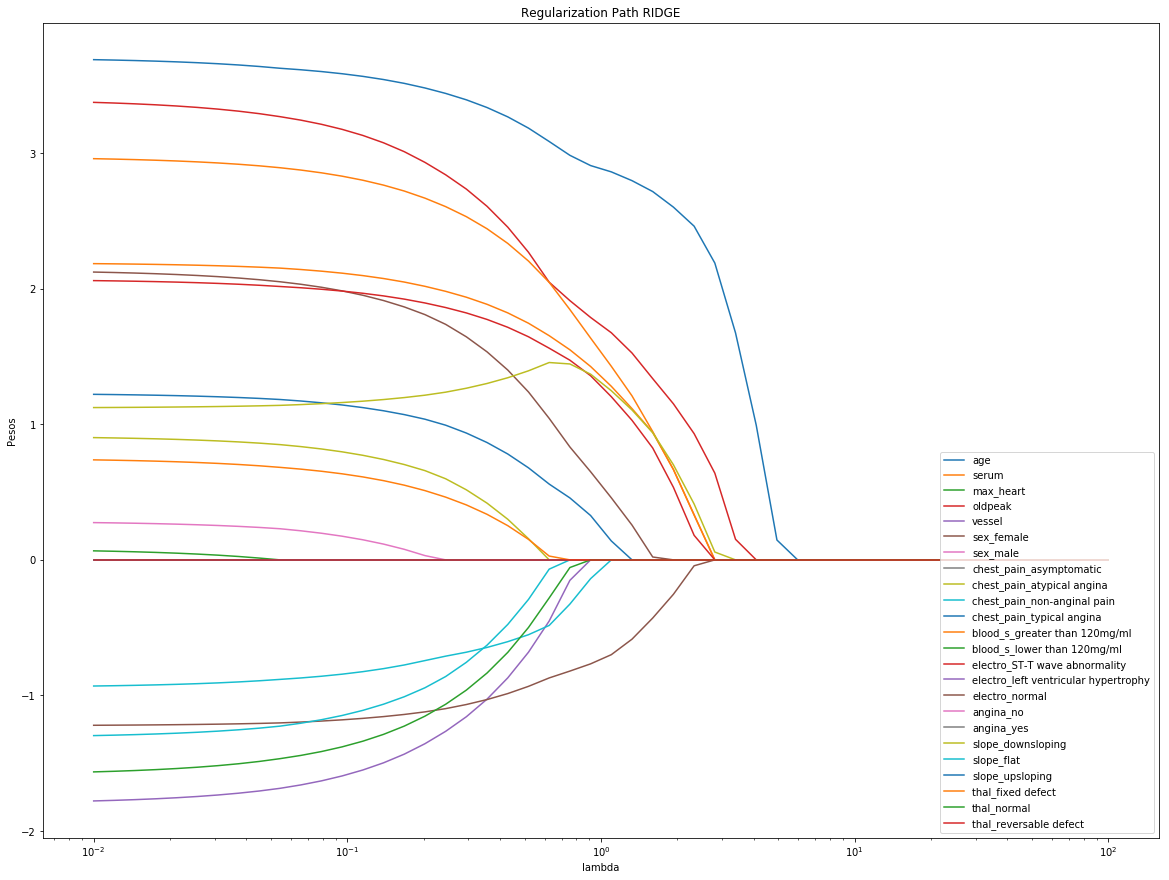

In [26]:
D = 50
F = np.random.normal(loc = 70, scale = 400, size=(Xstd_train.shape[0],D) ) #fake features
X_new_train= np.concatenate([Xstd_train, F], axis=-1)

alphas_ = np.logspace(2,-2,base=10)
coefs = []
model = Lasso(fit_intercept=True)
for a in alphas_:
    model.set_params(alpha=a)
    model.fit(Xstd_train, reg_label_train)
    coefs.append(model.coef_)

names_regressors = df.columns
plt.figure(figsize=(20,15))
for y_arr, label in zip(np.squeeze(coefs).T, names_regressors):
    plt.plot(alphas_, y_arr, label=label)
plt.legend()
plt.xscale('log')
plt.title('Regularization Path RIDGE')
plt.legend(loc='lower right')
plt.xlabel("lambda")
plt.ylabel("Pesos")
plt.show()



Efectivamente, varía dependiendo de la desviación estandar. Esto es debido a que, al ser un modelo de entrenamiento, resulta imprecindible tomar en cuenta la diferencia entre los valores del estudio.

p) Entrene un modelo de regresión lineal, el mejor explorado en la experimentación previa, para predecir la presión sanguínea de los pacientes sanos, así obtener un modelo que estima cuál debiera ser el nivel sanguíneo en base al resto de información del paciente.

In [40]:
mask_norm = class_label_train == 0 
model = Ridge(fit_intercept=True, solver='svd')

model.fit(Xstd_train, reg_label_train)

blood_p_tr = model.predict(Xstd_train) 
blood_p_te = model.predict(Xstd_test)


q) Realice una clasificación de los pacientes a través de definir un umbral de decisión óptimo sobre la presión sanguínea estimada por el modelo. Por ejemplo, una cantidad mayor a $p$ es considerado como anormal (enfermo). Para ésto utilice la distribución predicha de este atributo para poder separar correctamente entre los dos tipos de comportamiento, normal (sano) y anormal (enfermo).

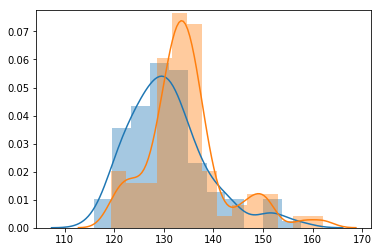

In [48]:
import seaborn as sns
sns.distplot(blood_p_tr[mask_norm], label="normal behavior")
sns.distplot(blood_p_tr[~mask_norm], label="ill person behavior")
plt.show()

def predict_umbr(data, umbral_up, umbral_low):
    preds = []
    for value in data:
        if value > umbral_up or value < umbral_low:
            preds.append(1) #presencia
        else:
            preds.append(0)
    return np.asarray(preds)

pred_train = predict_umbr(blood_p_tr, 130, 110)
pred_test = predict_umbr(blood_p_te, 130, 110)

r) Mida la calidad de la clasificación entregada a través de la exactitud (*accuracy*) sobre ambos conjuntos. Evalúe si es necesario variar la decisión sobre el umbral del punto anterior. *Recuerde que, al ser un problema binario, el mínimo que se espera es por sobre 50\%*

In [49]:
from sklearn.metrics import accuracy_score
print("Score train: ",accuracy_score(class_label_train, pred_train))
print("Score test: ",accuracy_score(class_label_test, pred_test))

Score train:  0.6195652173913043
Score test:  0.5116279069767442


Al analizar la calidad de clasificación de ambos conjuntos, es posible concluir que el umbral definido es coherente con el estudio, dado que ambos son superiores al 50%

s) Compare su *framework* de clasificación con un modelo lineal simple de clasificación binaria como el *perceptrón*, el cual se entrenará para aprender directamente la tarea (de manera supervisada), sin utilizar la información de presión sanguínea. Comente sobre las diferencias, ventajas y desventajas, de cada *approach*.

In [50]:
from sklearn.linear_model import Perceptron
model = Perceptron(fit_intercept=True, eta0=1.0, max_iter=1000, n_jobs=-1)
model.fit(Xstd_train, class_label_train)
pred_train = model.predict(Xstd_train) 
pred_test = model.predict(Xstd_test)
print("Score train: ",accuracy_score(class_label_train, pred_train))
print("Score test: ",accuracy_score(class_label_test, pred_test))

Score train:  0.8695652173913043
Score test:  0.8023255813953488


/Users/Gabriel/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Al comparar la calidad de clasificación entre el perceptrón y el modelo de Ridge, se observa que la entregada para el perceptrón es bastante mejor. Esto se pudiese deber a que el primero entrena con el conjunto de datos, mientras que el modelo de Ridge no lo hace.
Cabe mencionar que en la mayoría de los casos, Ridge será mejor, ya que el perceptrón es mas propenso a ocasionar overfitting.

t) Para poder darle una explicación más visual a la clasificación de ambos modelos, y así entender mejor dónde podría estar el error, proyecte los datos en 2 dimensiones. Utilice la técnica de reducción de dimensionalidad **PCA** para representar los datos en las dimensiones deseadas. Comente sobre el comportamiento, puede colorear los datos dado el estado del paciente (enfermedad) y/o la predicción de alguno de los modelos (Perceptrón o con umbral).

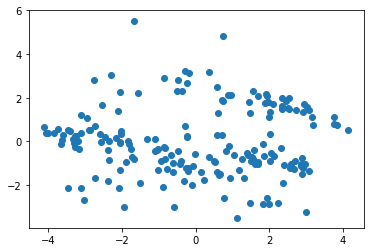

In [60]:
from sklearn.decomposition import PCA
d = 2
pca_model = PCA(n_components=d)
pca_model.fit(Xstd_train)
X_pca_train = pca_model.transform(Xstd_train)
X_pca_test = pca_model.transform(Xstd_test)
plt.scatter(X_pca_train[:,0], X_pca_train[:,1])
plt.show()

u) Vuelve a realizar lo anterior pero con otra técnica de reducción de dimensionalidad, como por ejemplo **ICA** [[3]](#refs). Comente)

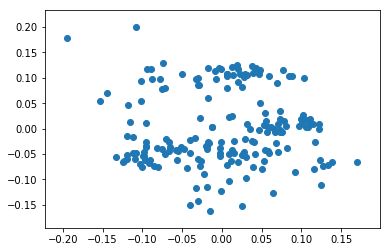

In [63]:
from sklearn.decomposition import FastICA
d = 2
ica_model = FastICA(n_components=d)
ica_model.fit(Xstd_train)
X_ica_train = ica_model.transform(Xstd_train)
X_ica_test = ica_model.transform(Xstd_test)
plt.scatter(X_ica_train[:,0], X_ica_train[:,1])
plt.show()

v) ¿Qué tanto se ve afectada la calidad de predicción si se utiliza la representación reducida generada por PCA vs la representación original? ¿Es esperable este fenómeno? ¿Podría mejorar la calidad de predicción? Proponga e implemente un criterio para seleccionar el número de componentes $d$ en PCA. Comente

Parte 2)

In [64]:
import numpy as np
import scipy.io as sio
import random
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import sys
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
np.set_printoptions(threshold=sys.maxsize)

mat_file_test = sio.loadmat("eventest.mat")

data_test = mat_file_test["tecoll"][0][0] # is "tecoll" for testing set
age_test = data_test[1]
event_train = sio.loadmat("eventrain.mat")
data_train = event_train["trcoll"][0][0] # is "tecoll" for testing set
data_age_train = data_train[1]

genFeat = data_train[0]   # Contextual features
ffcoefs = data_train[3]   # Fisherface space
faceGist = data_train[4]  # GIST features



modelo1 = linear_model.LinearRegression()    
X = genFeat
Y= data_age_train
modelo1.fit(X,Y)
Y_pred1 = modelo1.predict(data_age_train)
 
modelo2 = linear_model.LinearRegression()
X = ffcoefs
modelo2.fit(X,Y)
Y_pred2 = modelo2.predict(data_age_train)

modelo3 = linear_model.LinearRegression()
X = faceGist
modelo3.fit(X,Y)
Y_pred3 = modelo3.predict(data_age_train)

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def minimo(Y1,Y2,Y3,Y):
    
    minima_dif = np.minimum(abs(Y1-Y),abs(Y2-Y),abs(Y3-Y))
    if minima_dif == abs(Y1-Y):
        return Y1
    elif minima_dif == abs(Y2-Y):
        return Y2
    else:
        return Y3


vector = np.zeros(len(Y))
for i in range(0,len(Y)):
    
    A = (minimo(Y_pred1[i],Y_pred2[i],Y_pred3[i],Y[i]))
    vector[i] = A
    

print(mean_absolute_percentage_error(Y,vector))
print(mean_absolute_error(Y,vector))




ValueError: shapes (3500,1) and (14,1) not aligned: 1 (dim 1) != 14 (dim 0)

Para el desarrollo de la pregunta 2), lo que se hizo fue una regresión lineal con cada matriz dada (genFeat, ffcoefs, faceGist), es decir X = genFeat o ffcoefs o faceGist, para luego hacer Y = age_true = X*B + error

Al obtener los 3 modelos (3 ecuaciones) con cada matriz, se decidió utilizar cada el mejor i-ésimo valor de cada matriz que mejor repesenta al valor de la edad de dicho elemento, por eso se define la función minimo(Y1,Y2,Y3,Y).

Se escoge el menor y se actualiza en la variable vector, la cual sería la y_pred, a partir de 3 modelos distintos.
